# Domain Coloring

Source: 

  - Title:   Scientific Visualisation - Python & Matplotlib
  - Author:  Nicolas P. Rougier
  - URL:     https://github.com/rougier/scientific-visualization-book
  - License: BSD

TODO:
  - plots & contours
  - start 3D plots with real and imag, urk, not very useful.
  - vectorisation
  - tricks with integer (non-labelled) contours
  - exploration with real, imag. Use IFT & conformal transform to explain what we see (90° angles) ?
  - then modulus, log-modulus, angle, etc.

In [4]:
from numpy import *
from matplotlib.pyplot import *

## Complex functions as mappings of the plane

In [54]:
def circle(c=0j, r=1.0, θ=0.0, n=1):
    def gamma(t):
       return r * exp(2*pi*1j*n*t + θ) + c
    return gamma

def line(z0, z1):
   def gamma(t):
      return (1-t)*z0 + t*z1
   return gamma

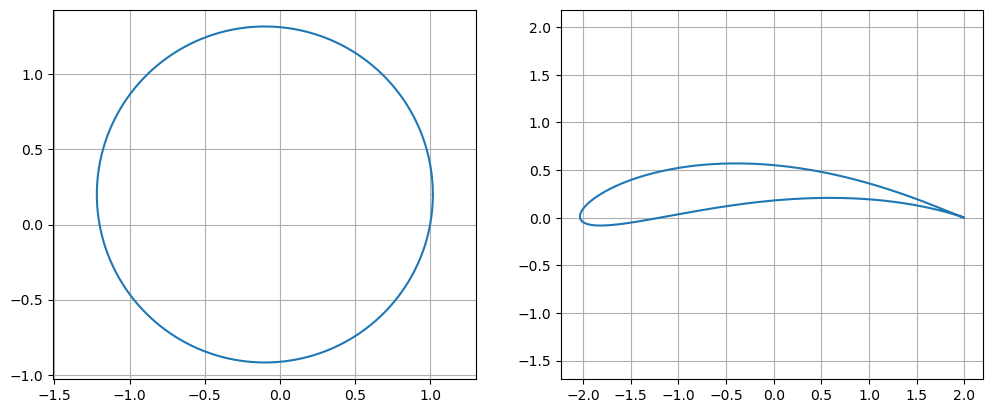

In [66]:

def Joukowsky(z):
    return z + 1.0 / z

c = -0.1 + 0.2j
r = abs(c - 1)

gamma = circle(c=c, r=r)
J_gamma = lambda t: Joukowsky(gamma(t))

fig, (ax1, ax2) = subplots(1,2)
fig.set_figwidth(12)

t = linspace(0.0, 1.0, 1000)

ax1.plot(gamma(t).real, gamma(t).imag, color="C0")
ax1.grid(True)
ax1.axis("equal")

ax2.plot(J_gamma(t).real, J_gamma(t).imag, color="C0")
ax2.grid(True)
ax2.axis("equal")

None



(6.165963314674109, 8.32143266990676, -1.078619225829574, 1.078619225829574)

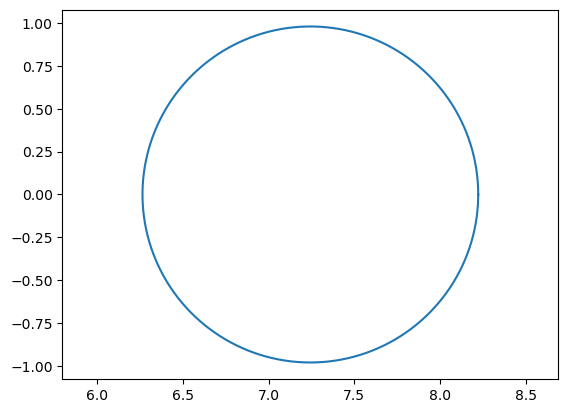

In [44]:
Jgt = Joukowsky(gt)
plot(Jgt.real, Jgt.imag)
axis("equal")
None

In [41]:
# TODO: collection of functions and small gallery

def Joukowsky(z):
    return z + 1.0 / z

def f(Z):
    return Z # try several multiplicities, products, ratios, etc.

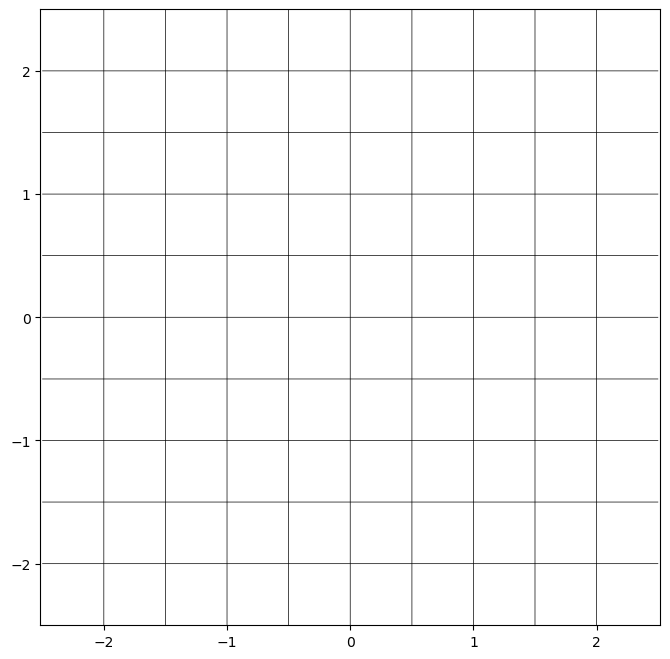

In [6]:
# Honnestly, not sure that plotting Re and Im is useful in any way.
# But the rendering is also a bit weird TBH, I should check what's going on.
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = f(Z)

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, W.real - round_(W.real), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, W.imag - round_(W.imag), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None


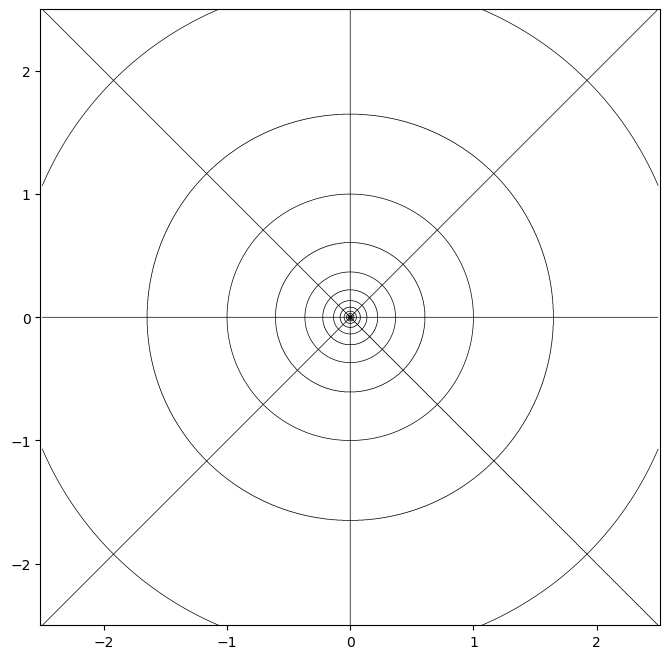

In [7]:
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = f(Z)
L = log(abs(W)) # symmetric for poles & zeros
N = 2
A = (angle(W)/pi) * N #  multiples of pi/N mapped to integers

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, L - round_(L), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, A - round_(A), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None

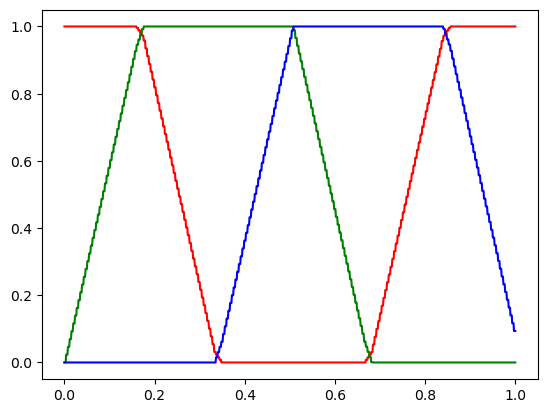

In [8]:
import matplotlib.cm as mcm

colormap = mcm.get_cmap("hsv")
u = linspace(0.0, 1.0, 1024)
RGBA = colormap(u)  # float64, but discretised (8-bit)
RGB = RGBA[:, :3]
plot(u, RGB[:, 0], color="red")
plot(u, RGB[:, 1], color="green")
plot(u, RGB[:, 2], color="blue")

None

# NOTA: we can deliver a RBGA array to imshow, that works! 👍


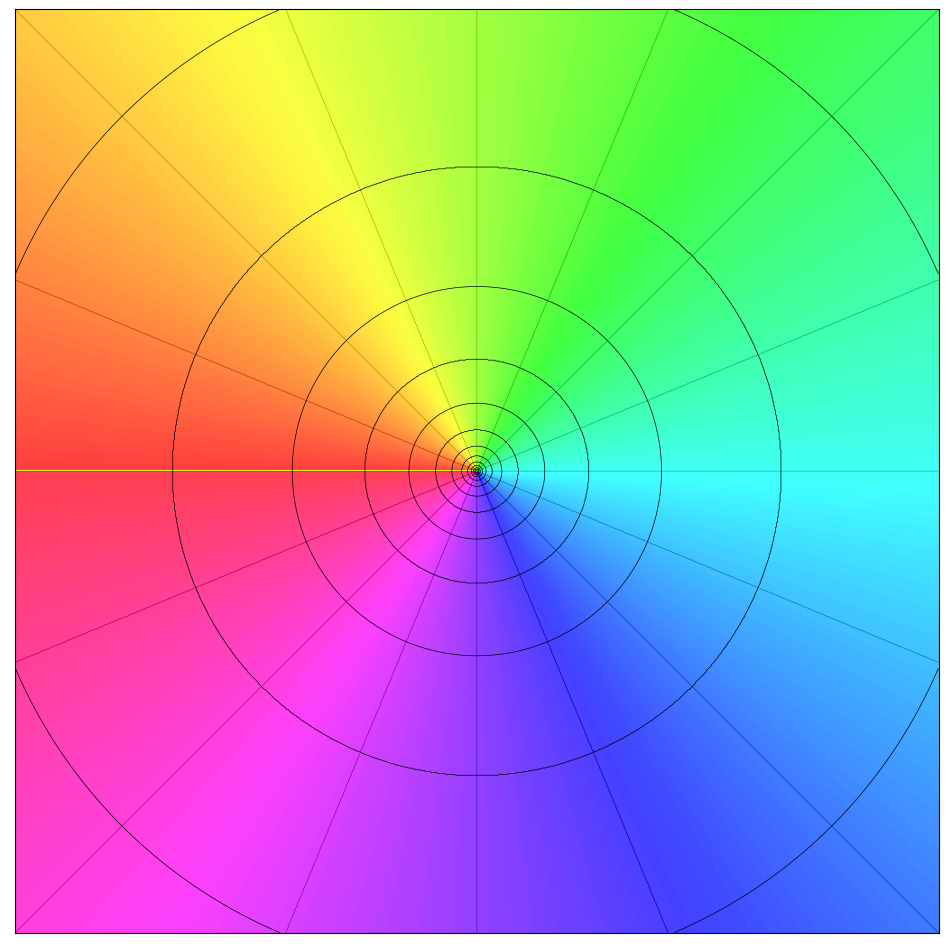

In [9]:
# TODO: 

T = linspace(-2.5, 2.5, 1024)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = f(Z)

A = angle(W)
N = 4
An = (A / pi) * N
L = log(abs(W))


figure(figsize=(12.0, 12.0))
xlim(-2.5, 2.5, -2.5, 2.5)
# ax = fig.add_axes([e, e, 1 - 2 * e, 1 - 2 * e], frameon=True, facecolor="black")
ax = gca()
ax.set_facecolor("white")

# TODO:
#   - deal with discontinuity
#   - tweak luminance of the image?
# => work with the A -> RBG conversion ourselves.

im = ax.imshow(
    A,
    interpolation="bicubic",
    cmap="hsv", #"twilight", #"Spectral",
    rasterized=True,
    alpha=0.75,
)
ax.contour(An - round_(An), 1, colors="black", linewidths=0.5, zorder=-100)
ax.contour(L - round_(L), 1, colors="black", linewidths=0.5)

#colorbar(im)
ax.set_xticks([])
ax.set_yticks([])
None